# Методы внутренней точки

## Задача выпуклой оптимизации с ограничениями типа равенств

\begin{equation*}
\begin{split}
&\min f(x) \\ 
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}

где $f$ - выпукла и дважды дифференцируема, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$

### Двойственная задача
Двойственная функция 

\begin{equation*}
\begin{split}
g(\mu) &  = -b^{\top}\mu + \inf_x(f(x) + \mu^{\top}Ax) \\
& = -b^{\top}\mu - \sup_x((-A^{\top}\mu)^{\top}x -f(x)) \\
& = -b^{\top}\mu - f^*(-A^{\top}\mu)
\end{split}
\end{equation*}

Двойственная задача

$$
\max_\mu -b^{\top}\mu - f^*(-A^{\top}\mu)
$$

**Подход 1**: найти сопряжённую функцию и решить безусловную задачу оптимизации

**Трудности**
- не всегда легко восстановить решение прямой задачи по решению двойственной
- сопряжённая функция $f^*$ должна быть дважды дифференцируемое для быстрого решения двойственной задачи. Это не всегда так.

### Условия оптимальности

- $Ax^* = b$
- $f'(x^*) + A^{\top}\mu^* = 0$

или

$$ \begin{bmatrix} f' & A^{\top} \\ A & 0 \end{bmatrix} \begin{bmatrix} x^{\\*} \\ \mu^{\\*} \end{bmatrix} = \begin{bmatrix} 0 \\ b \end{bmatrix} $$

**Подход 2**: решить нелинейную в общем случае систему методом Ньютона.

**Вопрос**: в каком случае система окажется линейной?

## Метод Ньютона для выпуклых задач с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min_v f(x) + f'(x)^{\top}v + \frac{1}{2}v^{\top}f''(x)v\\
\text{s.t. } & A(x + v) = b
\end{split}
\end{equation*}

Из условий оптимальности имеем

$$ \begin{bmatrix} f''(x) & A^{\top} \\ A & 0 \end{bmatrix} \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix} -f'(x) \\ 0 \end{bmatrix} $$

**Шаг метода Ньютона определён только для невырожденной матрицы!**

**Упражнение**. Посчитайте за сколько итераций метод Ньютона сойдётся для квадратичной функции с ограничениями типа равенств.

### Линеаризация условий оптимальности

- $A(x + v) = b \rightarrow Av = 0$
- $f'(x + v) + A^{\top}w \approx f'(x) + f''(x)v + A^{\top}w = 0$

или

- $f''(x)v + A^{\top}w = -f'(x)$

### Псевдокод

**Важно:** начальная точка должна лежать в допустимом множестве!

```python
def NewtonEqualityFeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, tol):
    
    x = x0
    
    n = x.shape[0]
    
    while True:
        
        newton_matrix = [[hessf(x), A.T], [A, 0]]
        
        rhs = [-gradf(x), 0]
        
        w = solve_lin_sys(newton_matrix, rhs)
        
        h = w[:n]
        
        if stop_crit(x, h, gradf(x), **kwargs) < tol:
            
            break
            
        alpha = line_search(x, h, f, gradf(x), **kwargs)
        
        x = x + alpha * h
        
    return x
```

### Критерий остановки
Получим выражение для значения

$$
f(x) - \inf_v(\hat{f}(x + v) \; | \; A(x+v) = b),
$$

где $\hat{f}$ - квадратичная аппроксимация функции $f$.

Для этого 

$$
\langle h^{\top} \rvert \cdot \quad f''(x)h + A^{\top}w = -f'(x)
$$

с учётом $Ah = 0$ получаем 

$$
h^{\top}f''(x)h = -f'(x)^{\top}h
$$

Тогда 

$$
\inf_v(\hat{f}(x + v) \; | \; A(x+v) = b) = f(x) - \frac{1}{2}h^{\top}f''(x)h
$$

**Вывод:** величина $h^{\top}f''(x)h$ является наиболее адекватным критерием остановки метода Ньютона.

### Теорема сходимости

Сходимость метода аналогична сходимости метода Ньютона для задачи безусловной оптимизации.

**Теорема**
Пусть выполнены следующие условия
- множество уровней $S = \{ x \; | \; x \in D(f), \; f(x) \leq f(x_0), \; Ax = b \}$ замкнуто и $x_0 \in D(f), \; Ax_0 = b$
-  для любых $x \in S$ и $\tilde{x} \in S$ гессиан $f''(x)$ липшицев
- на множестве $S$ $\|f''(x)\|_2 \leq M $ и норма обратной матрицы KKT системы ограничена сверху

Тогда, метод Ньютона сходится к паре $(x^*, \mu^*)$ линейно, а при достижении достаточной близости к решению - квадратично.

## Случай недопустимой начальной точки

- Метод Ньютона требует чтобы начальная точка лежала в допустимом множестве
- Что делать, если поиск такой точки неочевиден: например, если область определения $f$ не сопадает с $\mathbb{R}^n$
- Пусть начальная точка не является допустимой, в этом случае условия KKT можно записать так

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = -
\begin{bmatrix}
f'(x)\\
{\color{red}{Ax - b}}
\end{bmatrix}
$$

- Если $x$ допустима, то система совпадает с системой для обычного метода Ньютона

### Прямо-двойственная интерпретация

- Метод *прямо-двойственный*, если на каждой итерации обновляются прямые и двойственные переменные
- Покажем, что это значит. Для этого запишем условия оптимальности в виде

$$
r(x^*, \mu^*) = (r_p(x^*, \mu^*), r_d(x^*, \mu^*)) = 0,
$$

где $r_p(x, \mu) = Ax - b$ и $r_d(x, \mu) = f'(x) + A^{\top}\mu$
- Решим систему методом Ньютона:

$$
r(y + z) \approx r(y) + Dr(y)z = 0
$$


- Прямо-двойственный шаг в методе Ньютона определим как решение линейной системы

$$
Dr(y)z = -r(y)
$$

или более подробно

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d
\end{bmatrix}
 = -
\begin{bmatrix}
r_p(x, \mu)\\
r_d(x, \mu)
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x) + A^{\top}\mu\\
Ax - b
\end{bmatrix}
$$

- Заменим $z_d^+ = \mu + z_d$ и получим

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d^+
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x)\\
Ax - b
\end{bmatrix}
$$

- Система полностью эквивалентна ранее полученной в обозначениях 

$$
v = z_p \qquad w = z_d^+ = \mu + z_d 
$$

- Метод Ньютона даёт шаг для прямой переменной и обновлённое значение для двойственной

### Способ инициализации

- Удобный способ задания начального приближения: найти точку из области определения $f$ гораздо проще, чем из пересечения области определения и допустимого множества
- Метод Ньютона с недопустимой начальной точкой не может определить согласованность ограничений

### Псевдокод

```python
def NewtonEqualityInfeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, mu0, tol):
    
    x = x0
    
    mu = mu0
    
    n = x.shape[0]
    
    while True:
        
        z_p, z_d = ComputeNewtonStep(hessf(x), A, b)
        
        if stop_crit(x, z_p, z_d, gradf(x), **kwargs) < tol:
            
            break
            
        alpha = line_search(x, z_p, z_d, f, gradf(x), **kwargs)
        
        x = x + alpha * z_p
        
        mu = z_d
        
    return x
```

### Критерий остановки и линейный поиск

- Изменение $r_p$ после шага $z_p$

$$
A(x + \alpha z_p) - b = [A(x + z_p) = b] = Ax + \alpha(b - Ax) - b = (1 - \alpha)(Ax - b)
$$

- Итоговое изменение после $k$ шагов

$$
r^{(k)} = \prod_{i=0}^{k-1}(1 - \alpha^{(i)})r^{(0)}
$$

- Критерий остановки: $Ax = b$ и $\|r(x, \mu)\|_2 \leq \varepsilon$

- Линейный поиск: $c \in (0, 1/2)$, $\beta = (0, 1)$

```python
def linesearch(r, x, mu, z_p, z_d, c, beta):
    
    alpha = 1
    
    while np.linalg.norm(r(x + alpha * z_p, mu + alpha * z_d)) >= (1 - c * alpha) * np.linalg.norm(r(x, mu)):
        
        alpha *= beta
        
    return alpha

```

### Теорема сходимости

Результат аналогичен результаты для допустимой начальной точки

**Теорема.** Пусть
- множество подуровней $S = \{(x, \mu) \; | \; x \in D(f), \; \| r(x, \mu) \|_2 \leq \| r(x_0, \mu_0)  \|_2 \}$ замкнуто
- на множестве $S$ норма матрицы обратной к ККТ матрице ограничена
- гессиан липшицев на $S$.

Тогда сходимость метода линейна при удалении от решении и квадратичная при достаточном приближении к решению.

## Общая задача выпуклой оптимизации

\begin{equation*}
\begin{split}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i (x) \leq 0 \qquad i=1,\ldots,m\\
& Ax = b,
\end{split}
\end{equation*}

где $f_i$ - выпуклые и дважды непрерывно дифференцируемы, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$. 

Предполагаем, что задача строго разрешима, то есть выполняется условие Слейтера.

## Условия оптимальности

- Разрешимость прямой задачи

$$
Ax^* = b, \; f_i(x^*) \leq 0, \; i = 1,\ldots,m
$$

- Разрешимость двойственной задачи

$$
\lambda^* \geq 0
$$

- Стационарность лагранжиана

$$
f'_0(x^*) + \sum_{i=1}^m \lambda^*_if'_i(x^*) + A^{\top}\mu^* = 0
$$

- Условие дополняющей нежёсткости

$$
\lambda^*_i f_i(x^*) = 0, \qquad i = 1,\ldots, m
$$

## Идея

- Свести задачу с ограничениями типа **неравенств** к последовательности задач с ограничениями типа **равенств**
- Использовать методы для решения задачи с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m I_-(f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}

где $I_-$ - индикаторная функция

$$
I_-(u) = 
\begin{cases}
0, & u \leq 0\\
\infty, & u > 0
\end{cases}
$$

**Проблема.** Теперь целевая функция - **недифференцируема**.

## Логарифмический барьер

**Идея.** Приблизить функцию $I_-(u)$ функцией

$$
\hat{I}_-(u) = -t\log(-u),
$$

где $t > 0$ - параметр.

- Функции $I_-(u)$ и $\hat{I}_-(u)$ выпуклые и неубывающие
- Однако $\hat{I}_-(u)$ **дифференцируема** и приближается к $I_-(u)$ при $t \to 0$

Text(0.5, 0, 'u')

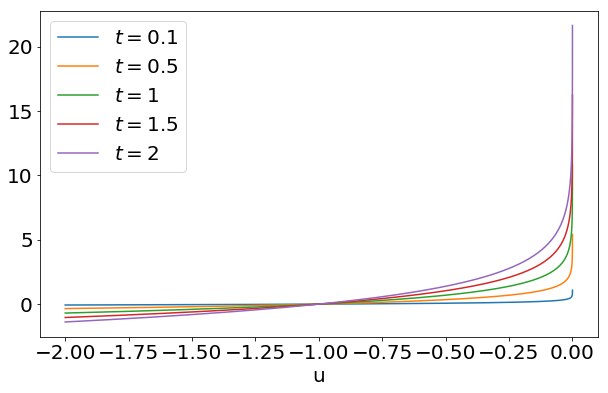

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 0, 100000, endpoint=False)
plt.figure(figsize=(10, 6))
for t in [0.1, 0.5, 1, 1.5, 2]:
    plt.plot(x, -t * np.log(-x), label=r"$t = " + str(t) + "$")
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("u", fontsize=20)

### "Ограниченная" задача

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m -t \log(-f_i(x))\\
\text{s.t. } & Ax = b
\end{split}
\end{equation*}

- Задача по-прежнему **выпуклая**
- Функция 

$$
\phi(x) = -\sum\limits_{i=1}^m \log(-f_i(x))
$$ 
называется *логарифмическим барьером*. Её область определения - множество точек, для котороых ограничения типа неравенств выполняются строго.

**Упражнение.** Найдите градиент и гессиан $\phi(x)$

## Центральный путь

Для каждого $t > 0$ "ограниченная" задача имеет единственное решение $x^*(t)$.

**Определение.** Последовательность $x^*(t)$ для $t > 0$ образует *центральный путь*.

## Условия оптимальности для "ограниченной" задачи

- Разрешимость прямой задачи

$$
Ax^*(t) = b, \; f_i(x^*) < 0, \; i = 1,\ldots,m
$$

- Стационарность лагранжиана

\begin{equation*}
\begin{split}
& f'_0(x^*(t)) + \phi'(x^*(t)) + A^{\top}\hat{\mu} = \\
& = f'_0(x^*(t)) - t\sum_{i=1}^m \frac{f_i'(x^*(t))}{f_i(x^*(t))} + A^{\top}\hat{\mu} = 0
\end{split}
\end{equation*}

- Обозначим 

$$
\lambda^*_i(t) = -\frac{t}{f_i(x^*(t))} \; i=1,\ldots,m \text{ и } \mu^* = \hat{\mu}
$$

- Тогда условие оптимальности можно записать как

$$
f'_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i'(x^*(t)) + A^{\top}\mu^* = 0
$$

- Тогда $x^*(t)$ минимизирует лагранжиан 

$$
L = f_0(x) + \sum_{i=1}^m \lambda_if_i(x) + \mu^{\top}(Ax - b)
$$

для $\lambda = \lambda^*(t)$ и $\mu = \mu^*$.

### Зазор двойственности

- Двойственная функция $g(\lambda^*(t), \mu^*)$ конечна и представима в виде

\begin{equation*}
\begin{split}
g(\lambda^*(t), \mu^*) & = f_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i(x^*(t)) + (\mu^*)^{\top}(Ax^*(t) - b)\\
& = f_0(x^*(t)) - mt
\end{split}
\end{equation*}

- Зазор двойственности

$$
f_0(x^*(t)) - p^* \leq mt
$$

- При $t \to 0$ зазор двойственности равен 0 и центральный путь сходится к решению исходной задачи.

## ККТ интерпретация

Условия оптимальности для "ограниченной" задачи эквивалентны условиям оптимальности для исходной задачи если

$$
-\lambda_i f_i(x) = 0 \to - \lambda_i f_i(x) = t \quad i = 1,\ldots, m
$$

## Физическая интерпретация
- Предположим, что ограничений типа равенства нет
- Рассмотрим неквантовую частицу в поле сил
- Каждому ограничению $f_i(x) \leq 0$ поставим в соответствие силу
$$
F_i(x) = -\nabla(-\log(-f_i(x))) = \frac{f'_i(x)}{f_i(x)}
$$
- Целевой функции также поставим в соответствие силу 
$$
F_0(x) = -\frac{f'_0(x)}{t}
$$
- Каждая точка из центрального пути $x^*(t)$ - это положение частицы, в котором выполняется баланс сил ограничений и целевой функции
- С уменьшением $t$ сила для целевой функции доминирует, и частица стремится занять положение, расположенное ближе к оптимальному
- Поскольку сила ограничений стремится к бесконечности при приближении частицы к границе, частица никогда не вылетит из допустимого множества

## Барьерный метод

- $x_0$ должна быть допустимой
- $t_0 > 0$ - начальное значение параметра
- $\alpha \in (0, 1)$ - множитель для уменьшения $t_0$

```python
def BarrierMethod(f, x0, t0, tol, alpha, **kwargs):
    
    x = x0
    
    t = t0
    
    while True:
        
        x = SolveBarrierProblem(f, t, x, **kwargs)
        
        if m * t < tol:
            
            break
            
        t *= alpha
        
    return x

```

### Точность решения "ограниченной" задачи

- Точное решение "ограниченной" задачи не требуется, так как приближённый центральный путь всё равно сойдётся к решению исходной задачи
- Двойственные переменные перестают быть двойственными при неточном решении, но это поправимо введением поправочных слагаемых
- Разница в стоимости точного и неточного центрального пути - несколько итераций метода Ньютона, поэтому существенного ускорения добиться нельзя

### Выбор параметров
- Множитель $\alpha$
    - При $\alpha \sim 1$, **мало** итераций нужно для решения "ограниченной" задачи, но **много** для нахождения точного решения исходной задачи
    - При $\alpha \sim 10^{-5}$ **много** итераций нужно для решения "ограниченной" задачи, но **мало** для нахождения точного решения исходной задачи
- Начальный параметр $t_0$
    - Аналогичная альтернатива как и для параметра $\alpha$
    - Параметр $t_0$ задаёт начальную точку для центрального пути

### Почти теорема сходимости

- Как было показано выше при $t \to 0$ барьерный метод сходится к решению исходной задачи
- Скорость сходимости напрямую связана с параметрами $\alpha$ и $t_0$, как показано ранее
- Основная сложность - быстрое решение вспомогательных задач методом Ньютона

## Задача поиска допустимого начального приближения

- Барьерный метод требует допустимого начального приближения
- Метод разбивается на две фазы
    - Первая фаза метода ищет допустимое начальное приближение
    - Вторая фаза использует найденное начальное приближение для запуска барьерного метода

### Первая фаза метода

Простой поиск допустимой точки

\begin{equation*}
\begin{split}
& \min s\\
\text{s.t. } & f_i(x) \leq s\\
& Ax = b
\end{split}
\end{equation*}

- эта задача всегда имеет строго допустимое начальное приближение
- если $s^* < 0$, то $x^*$ строго допустима и может быть использована в барьерном методе
- если $s^* > 0$, то задача не разрешима и допустимое множество пусто

### Сумма несогласованностей

\begin{equation*}
\begin{split}
& \min s_1 + \ldots + s_m\\
\text{s.t. } & f_i(x) \leq s_i\\
& Ax = b\\
& s \geq 0
\end{split}
\end{equation*}

- оптимальное значене равно нулю и достигается тогда и только тогда когда система ограничений совместна
- если задача неразрешима, то можно определить какие ограничения к этому приводят, то есть какие $s_i > 0$ 

### Вторая фаза метода

- После получения допустимой начальной точки $x_0$ выполняется обычный метод Ньютона для задачи с ограничениями равенствами

## Прямо-двойственный метод

Похож на барьерный метод, но
- нет разделения на внешние итерации и внутренние: на каждой итерации обновляются прямые и двойственные переменные
- направление определяется методом Ньютона, применённого к модифицированной системе ККТ
- последовательность точек в прямо-двойственном методе не обязательно допустимы 
- работает даже когда задача не строго допустима

### Сходимость для квадратичной целевой функции

При некоторых предположениях о начальной точке и начальном значении $\mu$, можно показать, что для достижения $\mu_k \leq \varepsilon$ потребуется 

$$
\mathcal{O}\left(\sqrt{n}\log \left( \frac{1}{\varepsilon}\right)\right)
$$ 
итераций


Доказательство и все детали можно найти [тут](https://epubs.siam.org/doi/book/10.1137/1.9781611971453?mobileUi=0) или [тут](https://www.maths.ed.ac.uk/~gondzio/reports/ipmXXV.pdf)

- Сравните с методами типа градиентного спуска, которые дают сходимость типа $\mathcal{O}\left( \frac{1}{\varepsilon} \right)$
- Зависит от размерности как $\sqrt{n}$
- На практике зависимость от размерности ещё слабее

## Резюме

- Метод Ньютона для выпуклой задачи с оганичениями типа равенств
- Случай недопустимой начальной точки
- Прямой барьерный метод
- Прямо-двойственный метод

## Применение методов внутренней точки к задаче линейного программирования

Исходная задача
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}

Аппроксимированная задача
\begin{align*}
&\min_x c^{\top}x {\color{red}{- \mu \sum\limits_{i=1}^n \ln x_i}} \\
\text{s.t. } & Ax = b\\
\end{align*}
для некоторого $\mu > 0$

### Барьерная функция

**Определение.** Функция $B(x, \mu) = -\mu\ln x$ называется *барьерной* для задачи с ограничением $x \geq 0$.

Более подробно о таких функциях будет рассказано в контексте нелинейной условной оптимизации...

### Что произошло?

- Сделали из линейной задачу нелинейную
- Перенесли ограничение типа неравенства в целевую функцию
- Ввели дополнительный параметр $\mu$

### Почему это хорошо?

Переход к задаче с ограничениями типа равенств $\to$ упрощение условий оптимальности, в частности

- Исключено требование дополняющей нежёсткости
- Исключено условие неотрицательности множителя Лагранжа для ограничения типа неравенства

### Условия оптимальности

- Лагранжиан: $L = c^{\top}x - \mu\sum\limits_{i=1}^n \ln x_i + \lambda^{\top}(Ax - b)$
- Стационарная точка $L$: 

$$
c - \mu X^{-1}e + A^{\top}\lambda = 0,
$$

где $X = \mathrm{diag}(x_1, \dots, x_n)$ и $e = [1, \dots, 1]$
- Ограничение типа равенства: $Ax = b$

Пусть $s = \mu X^{-1}e$, тогда условия оптимальности можно переписать так:
- $A^{\top}\lambda + c - s = 0 $
- $Xs = {\color{red}{\mu e}}$
- $Ax = b$

Также $x > 0 \Rightarrow s > 0$ 

## Сравнение с условиями оптимальности для исходной задачи

- Лагранжиан: $L = c^{\top}x + \lambda^{\top}(Ax - b) - s^{\top}x$
- Условие стационарности: $c + A^{\top}\lambda - s = 0$
- Допустимость прямой задачи: $Ax = b, \; x \geq 0$
- Допустимость двойственной: $s \geq 0$
- Условие дополняющей нежёсткости: $s_ix_i = 0$

### После упрощения

- $A^{\top}\lambda + c - s = 0$
- $Ax = b$
- $Xs = {\color{red}{0}}$
- $x \geq 0, \; s \geq 0$

### Вывод

- Введение барьерной функции c множителем $\mu$ эквивалентно релаксации условий дополняющей нежёсткости на параметр $\mu$
- При $\mu \to 0$ решения задач совпадают!
- Итеративное решение задачи с барьерной функцией вместе с уменьшением $\mu$. Последовательность решений сойдётся к вершине симплекса по траектории из точек, лежащих внутри симплекса.

### Общая схема
```python
def GeneralInteriorPointLP(c, A, b, x0, mu0, rho, tol):
    
    x = x0
    
    mu = mu0
    
    e = np.ones(c.shape[0])
    
    while True:
        
        primal_var, dual_var = StepInsideFeasibleSet(c, A, b, x, mu)
        
        mu *= rho
        
        if converge(primal_var, dual_var, c, A, b, tol) and mu < tol:
            
            break
            
    return x
```

## Как решать задачу с барьерной функцией?

- Прямой метод 
- Прямо-двойственный метод

## Прямой метод

Вспомним исходную задачу:
\begin{align*}
&\min_x c^{\top}x - \mu \sum\limits_{i=1}^n \ln x_i \\
\text{s.t. } & Ax = b\\
\end{align*}

Идея: приблизим целевую функцию до второго порядка, как в методе Ньютона.

### Реализация
На $(k+1)$-ой итерации необходимо решить следующую задачу: 

\begin{align*}
&\min_p \frac{1}{2}p^{\top}Hp + g^{\top}p\\
\text{s.t. } & A(x_k + p) = b,\\
\end{align*}

где $H = \mu X^{-2}$ - гессиан, и $g = c - \mu X^{-1}e$ - градиент.

### Снова KKT

Выпишем условия ККТ для этой задачи
- $Hp + g + A^{\top}\lambda = 0$
- $Ap = 0$

или
$$\begin{bmatrix} H & A^{\top}\\ A & 0 \end{bmatrix} \begin{bmatrix} p\\ \lambda \end{bmatrix} = \begin{bmatrix} -g \\ 0 \end{bmatrix}$$

Из первой строки:

$$
-\mu X^{-2}p + A^{\top}\lambda = c - \mu X^{-1}e
$$

$$
-\mu Ap + AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$

$$
AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$

Так как $X \in \mathbb{S}^n_{++}$ и $A$ полного ранга, то уравнение имеет единственное решение $\lambda^*$.

### Найдём направление $p$

$$
-\mu p + X^2A^{\top}\lambda^* = X^2c - \mu Xe = X^2c - \mu x
$$

$$
p = x + \frac{1}{\mu}X^2(A^{\top}\lambda^* - c)
$$

### Способы решения системы из ККТ

1. Прямой способ: формирование матрицы $(n + m) \times (n + m)$ и явное решение системы - $\frac{1}{3}(n + m)^3$
2. Последовательное исключение переменных:
    - $Hp + A^{\top}\lambda = -g$, $p = -H^{-1}(g + A^{\top}\lambda)$
    - $Ap = -AH^{-1}(g + A^{\top}\lambda) = -AH^{-1}A^{\top}\lambda - AH^{-1}g = 0$
    
    Здесь матрица $-AH^{-1}A^{\top}$ есть *дополнение по Шуру* матрицы $H$.
3. Алгоритм вычисления решения при последовательном исключении переменных
    - Вычислить $H^{-1}g$ и $H^{-1}A^{\top}$ - $f_H + (m+1)s_H$ операций
    - Вычислить дополнение по Шуру $-AH^{-1}A^{\top}$ - $\mathcal{O}(m^2n)$
    - Найти $\lambda$ - $\frac{1}{3}m^3$ операций
    - Найти $p$ - $s_H + \mathcal{O}(mn)$ операций
4. Итого: $f_H + ms_H + \frac{m^3}{3} + \mathcal{O}(m^2n)$ уже гораздо быстрее прямого способа

### Используем структуру матрицы $H$

- В нашем случае $H = \mu X^{-2}$ - диагональная матрица!
- $f_H$ - $n$ операций
- $s_H$ - $n$ операций
- Итоговая сложность $\frac{m^3}{3} + \mathcal{O}(m^2n)$ операций, где $m \ll n$

### Поиск шага $\alpha$

- Обычный линейный поиск с условиями достаточного убывания
- Условие $A(x_k + \alpha p) = b$ выполняется автоматически

### Псевдокод прямого барьерного метода

```python
def PrimalBarrierLP(c, A, b, x0, mu0, rho, tol):
    
    x = x0
    
    mu = mu0
    
    e = np.ones(x.shape[0])
    
    while True:
        
        p, lam = ComputeNewtonDirection(c, x, A, mu)
        
        alpha = line_search(p, mu, c, x)
        
        x = x + alpha * p
        
        mu = rho * mu
        
        if mu < tol and np.linalg.norm(x.dot(c - A.T.dot(lam)) - mu * e) < tol:
            
            break
            
    return x
```

## Сравнение барьерного метода и прямого метода внутренней точки

- Пример Klee-Minty 
\begin{align*}
& \max_{x \in \mathbb{R}^n} 2^{n-1}x_1 + 2^{n-2}x_2 + \dots + 2x_{n-1} + x_n\\
\text{s.t. } & x_1 \leq 5\\
& 4x_1 + x_2 \leq 25\\
& 8x_1 + 4x_2 + x_3 \leq 125\\
& \ldots\\
& 2^n x_1 + 2^{n-1}x_2 + 2^{n-2}x_3 + \ldots + x_n \leq 5^n\\
& x \geq 0
\end{align*}
- Какая сложность работы симплекс метода?

- Сведение к стандартной форме

\begin{align*}
& \min_{x, \; z} -c^{\top}x \\
\text{s.t. } & Ax + z = b\\
& x \geq 0, \quad z \geq 0
\end{align*}

- Сравним скорость работы прямого барьерного метода и симплекс-метода

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as scopt
import scipy.linalg as sclin

In [20]:
def NewtonLinConstraintsFeasible(f, gradf, hessf, A, x0, line_search, linsys_solver, args=(), 
                                 disp=False, disp_conv=False, callback=None, tol=1e-6, max_iter=100, **kwargs):
    x = x0.copy()
    n = x0.shape[0]
    iteration = 0
    lam = np.random.randn(A.shape[0])
    while True:
        gradient, hess = gradf(x, *args), hessf(x, *args)
        h = linsys_solver(hess, A, gradient)
        descent_dir = h[:n]
        decrement = descent_dir.dot(hessf(x, *args).dot(descent_dir))
        if decrement < tol:
            if disp_conv:
                print("Tolerance achieved! Decrement = {}".format(decrement))
            break
        alpha = line_search(x, descent_dir, f, gradf, args, **kwargs)
        if alpha < 1e-16:
            if disp_conv:
                print("Step is too small!")
        x = x + alpha * descent_dir
        if callback is not None:
            callback((descent_dir, x))
        iteration += 1
        if disp:
            print("Current function val = {}".format(f(x, *args)))
            print("Newton decrement = {}".format(decrement))
        if iteration >= max_iter:
            if disp_conv:
                print("Maxiter exceeds!")
            break
    res = {"x": x, "num_iter": iteration, "tol": decrement}
    return res

In [21]:
def simple_solver(hess, A, gradient):
    n = hess.shape[0]
    n_lin_row, n_lin_col = A.shape
    modified_hess = np.zeros((n + n_lin_row, n + n_lin_row))
    modified_hess[:n, :n] = hess
    modified_hess[n:n + n_lin_row, :n_lin_col] = A
    modified_hess[:n_lin_col, n:n + n_lin_row] = A.T
    rhs = np.zeros(n + n_lin_row)
    rhs[:n] = -gradient
    h = np.linalg.solve(modified_hess, rhs)
    return h

def elimination_solver(hess, A, gradient):
    inv_hess_diag = np.divide(1.0, np.diag(hess))
    inv_hess_grad = np.multiply(-inv_hess_diag, gradient)
    rhs = A.dot(inv_hess_grad)
    L_inv_hess = np.sqrt(inv_hess_diag)
    AL_inv_hess = A * L_inv_hess
    # print(AL_inv_hess.shape)
    S = AL_inv_hess.dot(AL_inv_hess.T)
#     cho_S = sclin.cho_factor(S)
#     w = sclin.cho_solve(cho_S, rhs)
    w = np.linalg.solve(S, rhs)
    v = np.subtract(inv_hess_grad, np.multiply(inv_hess_diag, A.T.dot(w)))
#     h = np.zeros(hess.shape[1] + A.shape[0])
#     h[:hess.shape[1]] = v
#     h[hess.shape[1]:hess.shape[1] + A.shape[0]] = w
    return v

In [23]:
def backtracking(x, descent_dir, f, grad_f, args, **kwargs):
    beta1 = kwargs["beta1"]
    rho = kwargs["rho"]
    alpha = 1
    while f(x + alpha * descent_dir, *args) >= f(x, *args) + beta1 * alpha * grad_f(x, *args).dot(descent_dir) \
            or np.isnan(f(x + alpha * descent_dir, *args)):
        alpha *= rho
        if alpha < 1e-16:
            break
    return alpha

In [24]:
def generate_KleeMinty_test_problem(n):
    c = np.array([2**i for i in range(n)])
    c = -c[::-1]
    bounds = [(0, None) for i in range(n)]
    b = np.array([5**(i+1) for i in range(n)])
    a = np.array([1] + [2**(i+1) for i in range(1, n)])
    A = np.zeros((n, n))
    for i in range(n):
        A[i:, i] = a[:n-i]
    return c, A, b, bounds

In [26]:
n = 7
c, A, b, _ = generate_KleeMinty_test_problem(n)
eps = 1e-10
def f(x, c, mu):
    n = c.shape[0]
    return c.dot(x[:n]) - mu * np.sum(np.log(eps + x))

def gradf(x, c, mu):
    grad = np.zeros(len(x))
    n = c.shape[0]
    grad[:n] = c - mu / (eps + x[:n])
    grad[n:] = -mu / (eps + x[n:])
    return grad

def hessf(x, c, mu):
    return mu * np.diag(1. / (eps + x)**2)

A_lin = np.zeros((n, n + A.shape[0]))
A_lin[:n, :n] = A
A_lin[:n, n:n + A.shape[0]] = np.eye(A.shape[0])
mu = 0.1

#### Проверим верно ли вычисляется градиент

In [27]:
scopt.check_grad(f, gradf, np.random.rand(n), c, mu)

8.217611069205944e-07

### Выбор начального приближения допустимого по ограничениям и области определения целевой функции

In [28]:
x0 = np.zeros(2*n)
x0[:n] = np.random.rand(n)
x0[n:2*n] = b - A.dot(x0[:n])
print(np.linalg.norm(A_lin.dot(x0) - b))
print(np.sum(x0 <= 1e-6))

0.0
0


### Проверим сходимость

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Decrement value = 2.1302367667877004e-08


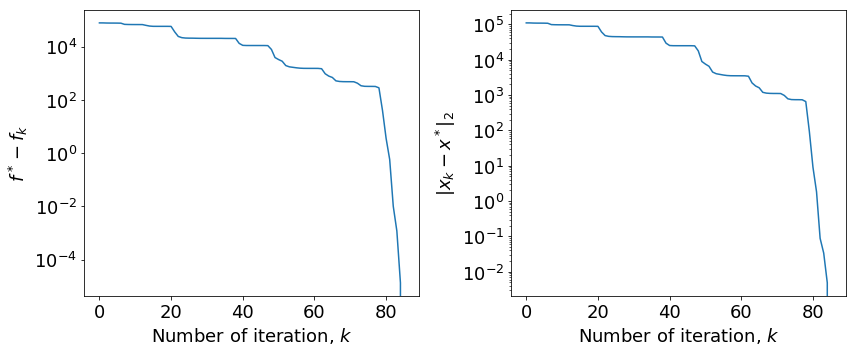

In [29]:
hist_conv = []
def cl(x):
    hist_conv.append(x)
res = NewtonLinConstraintsFeasible(f, gradf, hessf, A_lin, x0, backtracking, elimination_solver, (c, mu), callback=cl,
                           max_iter=2000, beta1=0.1, rho=0.7)
print("Decrement value = {}".format(res["tol"]))
fstar = f(res["x"], c, mu)
hist_conv_f = [np.abs(fstar - f(descdir_x[1], c, mu)) for descdir_x in hist_conv]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.semilogy(hist_conv_f)
plt.xlabel("Number of iteration, $k$", fontsize=18)
plt.ylabel("$f^* - f_k$", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

hist_conv_x = [np.linalg.norm(res["x"] - x[1]) for x in hist_conv]
plt.subplot(1,2,2)
plt.semilogy(hist_conv_x)
plt.xlabel("Number of iteration, $k$", fontsize=18)
plt.ylabel("$\| x_k - x^*\|_2$", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.tight_layout()

### Реализация барьерного метода

In [30]:
def BarrierPrimalLinConstr(f, gradf, hessf, A, c, x0, mu0, rho_mu, linesearch, linsys_solver, 
                           tol=1e-8, max_iter=500, disp_conv=False, **kwargs):
    x = x0.copy()
    n = x0.shape[0]
    mu = mu0
    while True:
        res = NewtonLinConstraintsFeasible(f, gradf, hessf, A, x, linesearch, linsys_solver, (c, mu), 
                                           disp_conv=disp_conv, max_iter=max_iter, beta1=0.01, rho=0.5)
        x = res["x"].copy()
        if n * mu < tol:
            break
        mu *= rho_mu
    return x

In [32]:
mu0 = 5
rho_mu = 0.5
x = BarrierPrimalLinConstr(f, gradf, hessf, A_lin, c, x0, mu0, rho_mu, backtracking, elimination_solver, max_iter=200)
# %timeit BarrierPrimalLinConstr(f, gradf, hessf, A_lin, c, x0, mu0, rho_mu, backtracking, elimination_solver, max_iter=100)
# %timeit BarrierPrimalLinConstr(f, gradf, hessf, A_lin, c, x0, mu0, rho_mu, backtracking, simple_solver, max_iter=100)
print(x[:n], 5**7)

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


[5.99985609e-07 1.19522565e-06 2.38665110e-06 4.77027807e-06
 9.53815674e-06 1.90744143e-05 7.81250138e+04] 78125


In [34]:
print(c, A, b)

[-64 -32 -16  -8  -4  -2  -1] [[  1.   0.   0.   0.   0.   0.   0.]
 [  4.   1.   0.   0.   0.   0.   0.]
 [  8.   4.   1.   0.   0.   0.   0.]
 [ 16.   8.   4.   1.   0.   0.   0.]
 [ 32.  16.   8.   4.   1.   0.   0.]
 [ 64.  32.  16.   8.   4.   1.   0.]
 [128.  64.  32.  16.   8.   4.   1.]] [    5    25   125   625  3125 15625 78125]


In [35]:
import cvxpy as cvx

x = cvx.Variable(n)
km_problem = cvx.Problem(cvx.Maximize(-c@x), [A @ x <= b, x >= 0])
km_problem.solve(solver=cvx.CVXOPT, verbose=True)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.9062e+04 -1.8554e+05  2e+05  4e-01  6e+00  1e+00
 1: -4.7497e+04 -8.2676e+04  4e+04  1e-01  1e+00  4e+02
 2: -2.6490e+04 -1.4171e+05  5e+05  3e-01  5e+00  3e+03
 3: -1.8691e+06 -5.9550e+06  2e+09  1e+01  2e+02  1e+06
 4: -8.1947e+05 -8.0224e+05  1e+08  1e+00  2e+01  5e+05
 5: -2.4821e+05 -3.4611e+05  1e+07  3e-01  4e+00  3e+03
 6: -1.0143e+05 -8.5466e+04  1e+05  3e-02  4e-01  3e+04
 7: -8.1026e+04 -8.1754e+04  1e+04  3e-03  4e-02  2e+02
 8: -7.8358e+04 -7.8397e+04  6e+02  2e-04  3e-03  2e+01
 9: -7.8135e+04 -7.8136e+04  2e+01  6e-06  9e-05  7e-01
10: -7.8125e+04 -7.8125e+04  2e-01  6e-08  9e-07  7e-03
11: -7.8125e+04 -7.8125e+04  2e-03  6e-10  9e-09  7e-05
Optimal solution found.


78125.00096686829

### Сравнение времени работы

In [13]:
mu0 = 2
rho_mu = 0.5
n_list = range(3, 10)
n_iters = np.zeros(len(n_list))
times_simplex = np.zeros(len(n_list))
times_barrier_simple = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    print("Current dimension = {}".format(n))
    c, A, b, bounds = generate_KleeMinty_test_problem(n)
    time = %timeit -o -q scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1}, method="simplex")
    times_simplex[i] = time.best
    A_lin = np.zeros((n, n + A.shape[0]))
    A_lin[:n, :n] = A
    A_lin[:n, n:n + A.shape[0]] = np.eye(A.shape[0])
    x0 = np.zeros(2*n)
    x0[:n] = np.random.rand(n)
    x0[n:2*n] = b - A.dot(x0[:n])
    time = %timeit -o -q BarrierPrimalLinConstr(f, gradf, hessf, A_lin, c, x0, mu0, rho_mu, backtracking, simple_solver)
    times_barrier_simple[i] = time.best

Current dimension = 3


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 4


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 5


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 6


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 7


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 8


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Current dimension = 9


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


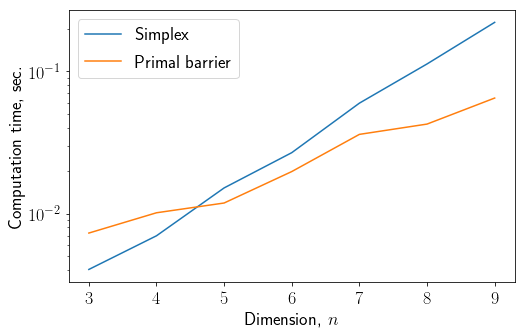

In [14]:
plt.figure(figsize=(8, 5))
plt.semilogy(n_list, times_simplex, label="Simplex")
plt.semilogy(n_list, times_barrier_simple, label="Primal barrier")
plt.legend(fontsize=18)
plt.xlabel("Dimension, $n$", fontsize=18)
plt.ylabel("Computation time, sec.", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Комментарии

- Было показано, что прямой метод эквивалентен методу Кармаркара
- Использует информацию только о прямой задаче
- Начальное приближение должно лежать в допустимом множестве - отдельная задача

## Барьеры для других задач

- Для задач полуопределённой опримизации (SDP) - $-\log\det X$
- Для задач с конусом второго порядка (SOCP) - $-\log (t^2 - \|x\|^2_2)$

 ## Конические задачи
 
 - То, что барьеры находятся для конусов - это не совпадение.
 - В [работе](https://epubs.siam.org/doi/book/10.1137/1.9781611970791?mobileUi=0) Ю. Нестерова и А. Немировского показано, что наиболее важные для практики конусы имеют **самосогласованные** барьеры, которые приводят к полиномиальности соответствующих методов
 - Не все выпуклые конусы обладают такими барьерами.
 - Поэтому существуют NP-трудные задачи выпуклой оптимизации.